In [2]:
#import dependencies
import pandas as pd
import matplotlib as plt
import numpy as np
import time
from datetime import datetime

In [3]:
#create random coordinates 

lats = np.random.uniform(low = -90, high = 90, size = 1500)
lngs = np.random.uniform(low = -180, high = 180, size = 1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
url = 'https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=' + weather_api_key 

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | sandwick
Processing Record 5 of Set 1 | vanino
Processing Record 6 of Set 1 | srednekolymsk
Processing Record 7 of Set 1 | tasiilaq
Processing Record 8 of Set 1 | victoria
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | sorvag
City not found. Skipping...
Processing Record 11 of Set 1 | pevek
Processing Record 12 of Set 1 | galgani
City not found. Skipping...
Processing Record 13 of Set 1 | tsabong
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | lubango
Processing Record 17 of Set 1 | cap malheureux
Processing Record 18 of Set 1 | toliary
City not found. Skipping...
Processing Record 19 of Set 1 | san quintin
Processing Record 20 of Set 1 | minggang
Processing Record 21 of Set 1 | sola
Proce

Processing Record 35 of Set 4 | asheville
Processing Record 36 of Set 4 | faanui
Processing Record 37 of Set 4 | saskylakh
Processing Record 38 of Set 4 | vanatorii mici
Processing Record 39 of Set 4 | bud
Processing Record 40 of Set 4 | cabo san lucas
Processing Record 41 of Set 4 | tilichiki
Processing Record 42 of Set 4 | codrington
Processing Record 43 of Set 4 | richards bay
Processing Record 44 of Set 4 | scranton
Processing Record 45 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 46 of Set 4 | illapel
Processing Record 47 of Set 4 | karasburg
Processing Record 48 of Set 4 | vologda
Processing Record 49 of Set 4 | sioux lookout
Processing Record 50 of Set 4 | aykhal
Processing Record 1 of Set 5 | yerofey pavlovich
Processing Record 2 of Set 5 | teguldet
Processing Record 3 of Set 5 | kenai
Processing Record 4 of Set 5 | sobolevo
Processing Record 5 of Set 5 | sonkovo
Processing Record 6 of Set 5 | grand gaube
Processing Record 7 of Set 5 | mikhaylovka
Proces

Processing Record 24 of Set 8 | juneau
Processing Record 25 of Set 8 | kashi
Processing Record 26 of Set 8 | shelburne
Processing Record 27 of Set 8 | techiman
Processing Record 28 of Set 8 | namatanai
Processing Record 29 of Set 8 | pacifica
Processing Record 30 of Set 8 | naze
Processing Record 31 of Set 8 | kununurra
Processing Record 32 of Set 8 | znamenskoye
Processing Record 33 of Set 8 | rumonge
Processing Record 34 of Set 8 | imbituba
Processing Record 35 of Set 8 | vila franca do campo
Processing Record 36 of Set 8 | el coyote
Processing Record 37 of Set 8 | bajo baudo
City not found. Skipping...
Processing Record 38 of Set 8 | vardo
Processing Record 39 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 40 of Set 8 | benguela
Processing Record 41 of Set 8 | muros
Processing Record 42 of Set 8 | eshowe
Processing Record 43 of Set 8 | ust-kuyga
Processing Record 44 of Set 8 | valky
Processing Record 45 of Set 8 | arman
Processing Record 46 of Set 8 

Processing Record 10 of Set 12 | shirokiy
Processing Record 11 of Set 12 | slave lake
Processing Record 12 of Set 12 | izmalkovo
Processing Record 13 of Set 12 | shunyi
Processing Record 14 of Set 12 | valdez
Processing Record 15 of Set 12 | piacabucu
Processing Record 16 of Set 12 | olafsvik
Processing Record 17 of Set 12 | conceicao do araguaia
Processing Record 18 of Set 12 | gabaldon
Processing Record 19 of Set 12 | bonavista
Processing Record 20 of Set 12 | karauzyak
City not found. Skipping...
Processing Record 21 of Set 12 | pajan
Processing Record 22 of Set 12 | calama
Processing Record 23 of Set 12 | emerald
Processing Record 24 of Set 12 | camacupa
Processing Record 25 of Set 12 | mayya
Processing Record 26 of Set 12 | oristano
Processing Record 27 of Set 12 | torata
Processing Record 28 of Set 12 | burgersdorp
Processing Record 29 of Set 12 | shuyskoye
Processing Record 30 of Set 12 | cabinda
Processing Record 31 of Set 12 | pacific grove
Processing Record 32 of Set 12 | cus

In [11]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.2078,-159.7750,82.45,78,20,11.50,CK,2022-03-24 03:44:38
1,Hobart,-42.8794,147.3294,69.66,51,75,14.97,AU,2022-03-24 03:45:06
2,Ushuaia,-54.8000,-68.3000,46.06,53,75,13.80,AR,2022-03-24 03:47:10
3,Sandwick,60.0000,-1.2500,46.22,87,48,3.44,GB,2022-03-24 03:47:10
4,Vanino,49.0869,140.2543,34.86,78,99,4.00,RU,2022-03-24 03:47:11
5,Srednekolymsk,67.4500,153.6833,11.55,87,98,6.85,RU,2022-03-24 03:47:11
6,Tasiilaq,65.6145,-37.6368,8.76,68,100,7.11,GL,2022-03-24 03:47:12
7,Victoria,22.2855,114.1577,67.32,89,100,10.00,HK,2022-03-24 03:47:12
8,Bethel,41.3712,-73.4140,39.56,80,100,10.36,US,2022-03-24 03:47:13
9,Pevek,69.7008,170.3133,21.83,84,100,0.98,RU,2022-03-24 03:47:16


In [12]:
city_data_df = city_data_df[['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Avarua,CK,2022-03-24 03:44:38,-21.2078,-159.7750,82.45,78,20,11.50
1,Hobart,AU,2022-03-24 03:45:06,-42.8794,147.3294,69.66,51,75,14.97
2,Ushuaia,AR,2022-03-24 03:47:10,-54.8000,-68.3000,46.06,53,75,13.80
3,Sandwick,GB,2022-03-24 03:47:10,60.0000,-1.2500,46.22,87,48,3.44
4,Vanino,RU,2022-03-24 03:47:11,49.0869,140.2543,34.86,78,99,4.00
...,...,...,...,...,...,...,...,...,...
546,Nanakuli,US,2022-03-24 04:02:29,21.3906,-158.1547,78.17,60,100,8.05
547,Huarmey,PE,2022-03-24 04:02:01,-10.0681,-78.1522,70.72,83,99,6.96
548,Alugan,PH,2022-03-24 04:03:30,12.2188,125.4808,82.92,76,54,9.22
549,Shubarkuduk,KZ,2022-03-24 04:03:30,49.1447,56.4872,20.26,93,71,5.77


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

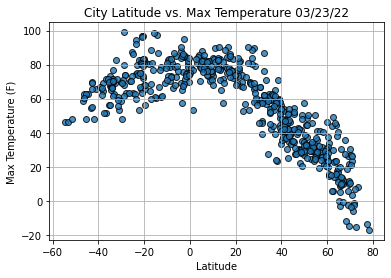

In [20]:
#build scatter plot for latitude vs max temp 
import matplotlib.pyplot as plt
plt.scatter(lats, max_temps,
           edgecolor = 'black', linewidths = 1, marker = 'o',
           alpha = .8, label = 'Cities')

plt.title(f'City Latitude vs. Max Temperature ' + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('weather_data/Fig1.png')

plt.show()

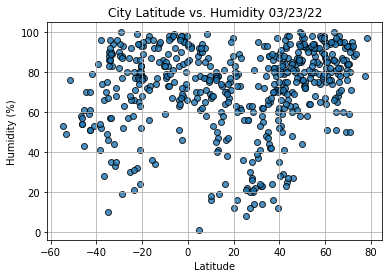

In [21]:
#build scatter plot for latitude vs humidity 
plt.scatter(lats, humidity,
           edgecolor = 'black', linewidths = 1, marker = 'o',
           alpha = .8, label = 'Cities')

plt.title(f'City Latitude vs. Humidity ' + time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('weather_data/Fig2.png')

plt.show()

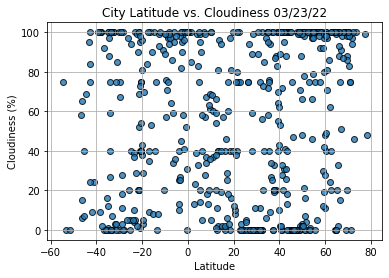

In [22]:
#build a scatter plot for latitude vs cloudiness
plt.scatter(lats, cloudiness,
           edgecolor = 'black', linewidths = 1, marker = 'o',
           alpha = .8, label = 'Cities')

plt.title(f'City Latitude vs. Cloudiness ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('weather_data/Fig3.png')

plt.show()

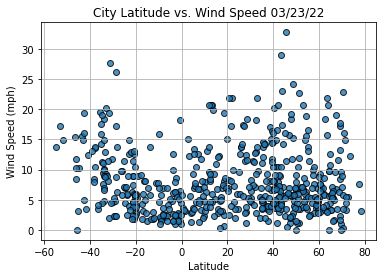

In [23]:
#build a scatter plot for latitude vs cloudiness
plt.scatter(lats, wind_speed,
           edgecolor = 'black', linewidths = 1, marker = 'o',
           alpha = .8, label = 'Cities')

plt.title(f'City Latitude vs. Wind Speed ' + time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('weather_data/Fig4.png')

plt.show()